In [ ]:
import numpy as np
from skimage import io, color, util, filters, transform
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

### Extract the number box out of the check

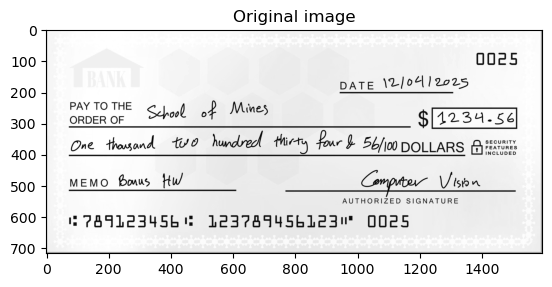

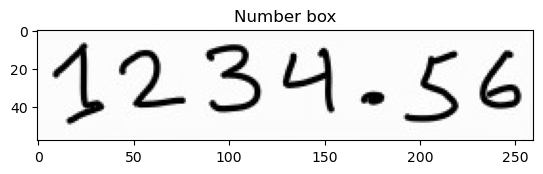

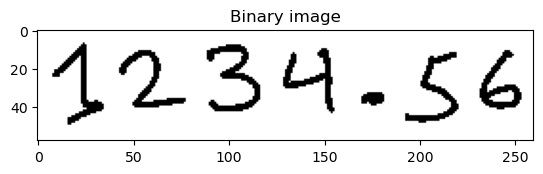

In [ ]:
# load image
img_orig = util.img_as_float32( color.rgb2gray( io.imread("data/cv_check.jpg") ) )
plt.imshow(img_orig, cmap='gray')
plt.title("Original image")
plt.show()

# crop the number box
# code ....
plt.imshow(img_numbox, cmap='gray')
plt.title("Number box")
plt.show()

# convert to binary 
# code ....
plt.imshow(img_bin , cmap='gray')
plt.title("Binary image")
plt.show()

### Use DBSCAN clustering to find individual digits

number of pixels that show a digit:  1652
detected clusters/digits:  [0, 1, 2, 3, 4, 5, 6]


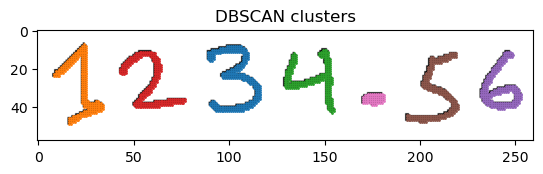

In [ ]:
# Extract x-y locations of pixels from the binary image that correspond to a digit
# code ....
print("number of pixels that show a digit: ", len(pt_coord))

# Run DBSCAN clustering to group pixels that belog to each digit
# code ....
print("detected clusters/digits: ", cluster_ids)


# Visualize clusters 
plt.imshow(img_bin, cmap='gray')
for cid in cluster_ids:
    pts = pt_coord[labels == cid]
    plt.scatter(pts[:,0], pts[:,1], s=1)
plt.title("DBSCAN clusters")
plt.show()


### Extract bounding box for each cluster/digit


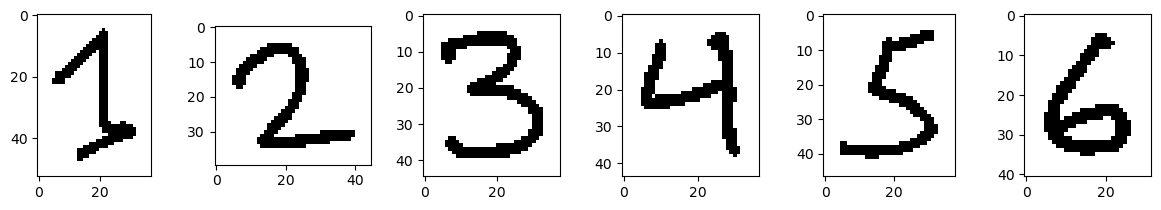

In [ ]:
# Extract out an image patch that has the pixels in each cluster/digit
# Make sure to add padding so digits aren't clipped
# Remove any non-digit image patch
# code ....


# Sort digits left-to-right (if needed)
# code ....

    
# display extracted digits    
num_digits = len(img_digit_sorted)
fig, axes = plt.subplots(1, num_digits, figsize=(12, 2.2))
axes = np.array(axes).reshape(1, num_digits)  # handles 1-row case
for i, ax in enumerate(axes.flat):
    ax.imshow(img_digit_sorted[i], cmap='gray')
plt.tight_layout()
plt.show()

### Train a CNN on MNIST dataset to recognize a single digit

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [ ]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data: Reshape for CNN, normalize to improve stability, invert images so that the digits are black on a white background.
# code ....


# Build a CNN model
# code ....
cnn_model.summary()


# Compile the CNN
# code ....


# Train the CNN
# code ....


# Evaluate on test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")


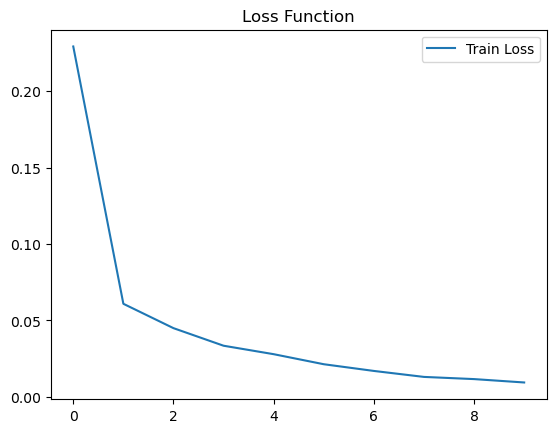

In [7]:
# Plot Training Curves
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.title('Loss Function')
plt.legend()
plt.show()


### Recognize each digit from its cropped image

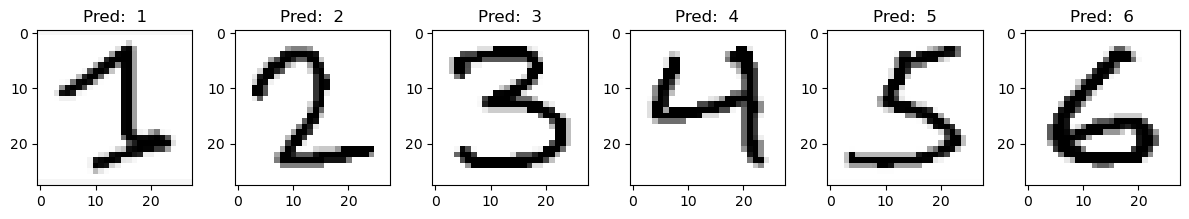

Final number: 123456


In [ ]:
# Input each segmented digit image to the trained CNN to predict its label
# code ....


# Display extracted digits inputted in the NN, and their resulting predictions   
num_digits = len(img_digit_resized)
fig, axes = plt.subplots(1, num_digits, figsize=(12, 2.2))
axes = np.array(axes).reshape(1, num_digits)  # handles 1-row case
for i, ax in enumerate(axes.flat):
    ax.imshow(img_digit_resized[i], cmap='gray')
    ax.set_title(f"Pred:  {predicted_digits[i]}")
plt.tight_layout()
plt.show()

# Combine digits into full number (if sorted left-to-right)
final_number = int("".join(str(d) for d in predicted_digits))
print("Final number:", final_number)

